In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import statsmodels.api as sm
import seaborn as sns
from numpy import median

In [2]:
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score

In [3]:
house_sales_df = pd.read_csv("house_sales_s1_mayel.csv",encoding='utf-8')

In [4]:
len(house_sales_df)

21613

In [5]:
house_sales_df.dropna(axis=1, how='all')
len(house_sales_df)

21613

In [6]:
house_sales_df['price'].min()

75000.0

In [7]:
house_sales_df['price'].max()

7700000.0

In [8]:
prices = house_sales_df['price']

In [9]:
pd.options.display.float_format = '{:12.2f}'.format

In [10]:
prices.describe()

count       21613.00
mean       540088.14
std        367127.20
min         75000.00
25%        321950.00
50%        450000.00
75%        645000.00
max       7700000.00
Name: price, dtype: float64

array([[<AxesSubplot:title={'center':'price'}>]], dtype=object)

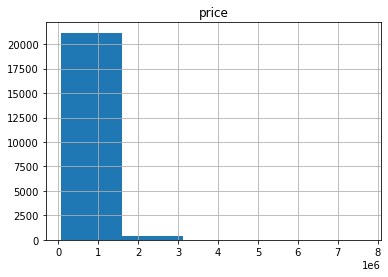

In [11]:
house_sales_df.hist(column='price', bins=5)

In [12]:
plt.figure(figsize=(20,20))

<Figure size 1440x1440 with 0 Axes>

<Figure size 1440x1440 with 0 Axes>

<AxesSubplot:>

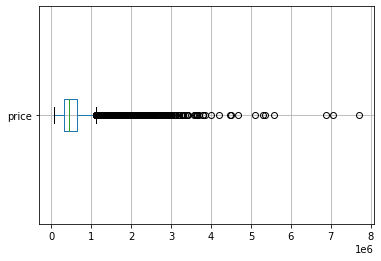

In [13]:
house_sales_df.boxplot(column=['price'], vert=False)

In [14]:
def clasifier(row):
    if row['price'] <= 75000:
        return "0-75000"
    elif row['price'] > 75000 and row['price'] <= 321950:
        return "75000-321950"
    elif row['price'] > 321950 and row['price'] <= 450000:
        return "321950-450000"
    elif row['price'] > 450000 and row['price'] <= 645000:
        return "450000-645000"
    elif row['price'] > 645000 and row['price'] <= 750000:
        return "645000-750000"
    elif row['price'] > 750000 and row['price'] <= 850000:
        return "750000-850000"
    elif row['price'] > 850000 and row['price'] <= 950000:
        return "850000-950000"
    elif row['price'] > 950000 and row['price'] <= 1500000:
        return "950000-1500000"
    elif row['price'] > 1500000 and row['price'] <= 2000000:
        return "1500000-2000000"
    elif row['price'] > 2000000 and row['price'] <= 2500000:
        return "2000000-2500000"
    elif row['price'] > 2500000 and row['price'] <= 3000000:
        return "2500000-3000000"
    elif row['price'] > 3000000 and row['price'] <= 3500000:
        return "3000000-3500000"
    elif row['price'] > 3500000 and row['price'] <= 4000000:
        return "3500000-4000000"
    elif row['price'] > 4000000 and row['price'] <= 4500000:
        return "4000000-4500000"
    elif row['price'] > 4500000 and row['price'] <= 5000000:
        return "4500000-5000000"
    elif row['price'] > 5000000 and row['price'] <= 6000000:
        return "5000000-6000000"
    elif row['price'] > 6000000 and row['price'] <= 7000000:
        return "6000000-7000000"
    elif row['price'] > 7000000 and row['price'] <= 8000000:
        return "7000000-8000000"
    elif row['price'] > 8000000 and row['price'] <= 9000000:
        return "8000000-9000000"
    elif row['price'] > 9000000 and row['price'] <= 10000000:
        return "9000000-10000000"
    else:
        return ">10000000"

    

In [15]:
house_sales_df["price_range"] = house_sales_df.apply(clasifier, axis=1)

In [16]:
house_sales_df["price_range"]

0         75000-321950
1        450000-645000
2         75000-321950
3        450000-645000
4        450000-645000
             ...      
21608    321950-450000
21609    321950-450000
21610    321950-450000
21611    321950-450000
21612    321950-450000
Name: price_range, Length: 21613, dtype: object

In [17]:
def clasifier_int(row):
    if row['price'] <= 75000:
        return 1
    elif row['price'] > 75000 and row['price'] <= 321950:
        return 2
    elif row['price'] > 321950 and row['price'] <= 450000:
        return 3
    elif row['price'] > 450000 and row['price'] <= 645000:
        return 4
    elif row['price'] > 645000 and row['price'] <= 750000:
        return 5
    elif row['price'] > 750000 and row['price'] <= 850000:
        return 6
    elif row['price'] > 850000 and row['price'] <= 950000:
        return 7
    elif row['price'] > 950000 and row['price'] <= 1500000:
        return 8
    elif row['price'] > 1500000 and row['price'] <= 2000000:
        return 9
    elif row['price'] > 2000000 and row['price'] <= 2500000:
        return 10
    elif row['price'] > 2500000 and row['price'] <= 3000000:
        return 11
    elif row['price'] > 3000000 and row['price'] <= 3500000:
        return 12
    elif row['price'] > 3500000 and row['price'] <= 4000000:
        return 13
    elif row['price'] > 4000000 and row['price'] <= 4500000:
        return 14
    elif row['price'] > 4500000 and row['price'] <= 5000000:
        return 15
    elif row['price'] > 5000000 and row['price'] <= 6000000:
        return 16
    elif row['price'] > 6000000 and row['price'] <= 7000000:
        return 17
    elif row['price'] > 7000000 and row['price'] <= 8000000:
        return 18
    elif row['price'] > 8000000 and row['price'] <= 9000000:
        return 19
    elif row['price'] > 9000000 and row['price'] <= 10000000:
        return 20
    else:
        return 21

In [18]:
house_sales_df["price_range_int"] = house_sales_df.apply(clasifier_int, axis=1)

In [19]:
house_sales_df["price_range_int"]

0        2
1        4
2        2
3        4
4        4
        ..
21608    3
21609    3
21610    3
21611    3
21612    3
Name: price_range_int, Length: 21613, dtype: int64

In [20]:
house_sales_df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,predict_bedrooms,predict_bathrooms,price_range,price_range_int
0,7129300520,20141013T000000,221900.00,3.00,1.00,1180.00,5650.00,1.00,0,0,...,0,98178,47.51,-122.26,1340,5650,3.00,1.50,75000-321950,2
1,6414100192,20141209T000000,538000.00,3.00,2.25,2570.00,7242.00,2.00,0,0,...,1991,98125,47.72,-122.32,1690,7639,3.00,2.00,450000-645000,4
2,5631500400,20150225T000000,180000.00,2.00,1.00,770.00,10000.00,1.00,0,0,...,0,98028,47.74,-122.23,2720,8062,2.00,1.00,75000-321950,2
3,2487200875,20141209T000000,604000.00,4.00,3.00,1960.00,5000.00,1.00,0,0,...,0,98136,47.52,-122.39,1360,5000,3.00,2.00,450000-645000,4
4,1954400510,20150218T000000,510000.00,3.00,2.00,1680.00,8080.00,1.00,0,0,...,0,98074,47.62,-122.05,1800,7503,3.00,2.00,450000-645000,4


In [21]:
train_df, test_df = train_test_split(house_sales_df, test_size=0.2, random_state=42, shuffle=True)

In [22]:
from sklearn.tree import DecisionTreeClassifier

In [23]:
classifierTree = DecisionTreeClassifier()

In [24]:
X = train_df[['bathrooms', 'grade', 'sqft_living']]

In [25]:
len(X)

17290

In [26]:
X.head()

,bathrooms,grade,sqft_living
6325,1.75,9,1780.00
13473,1.00,6,1000.00
17614,1.00,6,1080.00
16970,2.25,7,2090.00
20868,2.50,8,1741.00


In [27]:
Y = train_df['price_range_int']

In [28]:
len(Y)

17290

In [29]:
Y.head()

6325     3
13473    2
17614    2
16970    2
20868    4
Name: price_range_int, dtype: int64

In [30]:
classifierTree = classifierTree.fit(X, Y)

In [31]:
Xt = test_df[['bathrooms', 'grade', 'sqft_living']]

In [32]:
Yt = test_df['price_range_int']

In [33]:
Yp = classifierTree.predict(Xt)

In [34]:
Yp

array([4, 6, 8, ..., 3, 5, 4])

In [35]:
Yt

735      3
2830     7
4106     8
16218    8
19964    5
        ..
13674    3
20377    5
8805     2
10168    4
2522     3
Name: price_range_int, Length: 4323, dtype: int64

In [36]:
classifierTree.predict_proba(Xt)

array([[0.        , 0.25      , 0.125     , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.21052632, 0.36842105, ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.2       , 0.2       , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.18181818, ..., 0.        , 0.        ,
        0.        ]])

In [38]:
accuracy_score(Yt,Yp)

0.3472125838538052

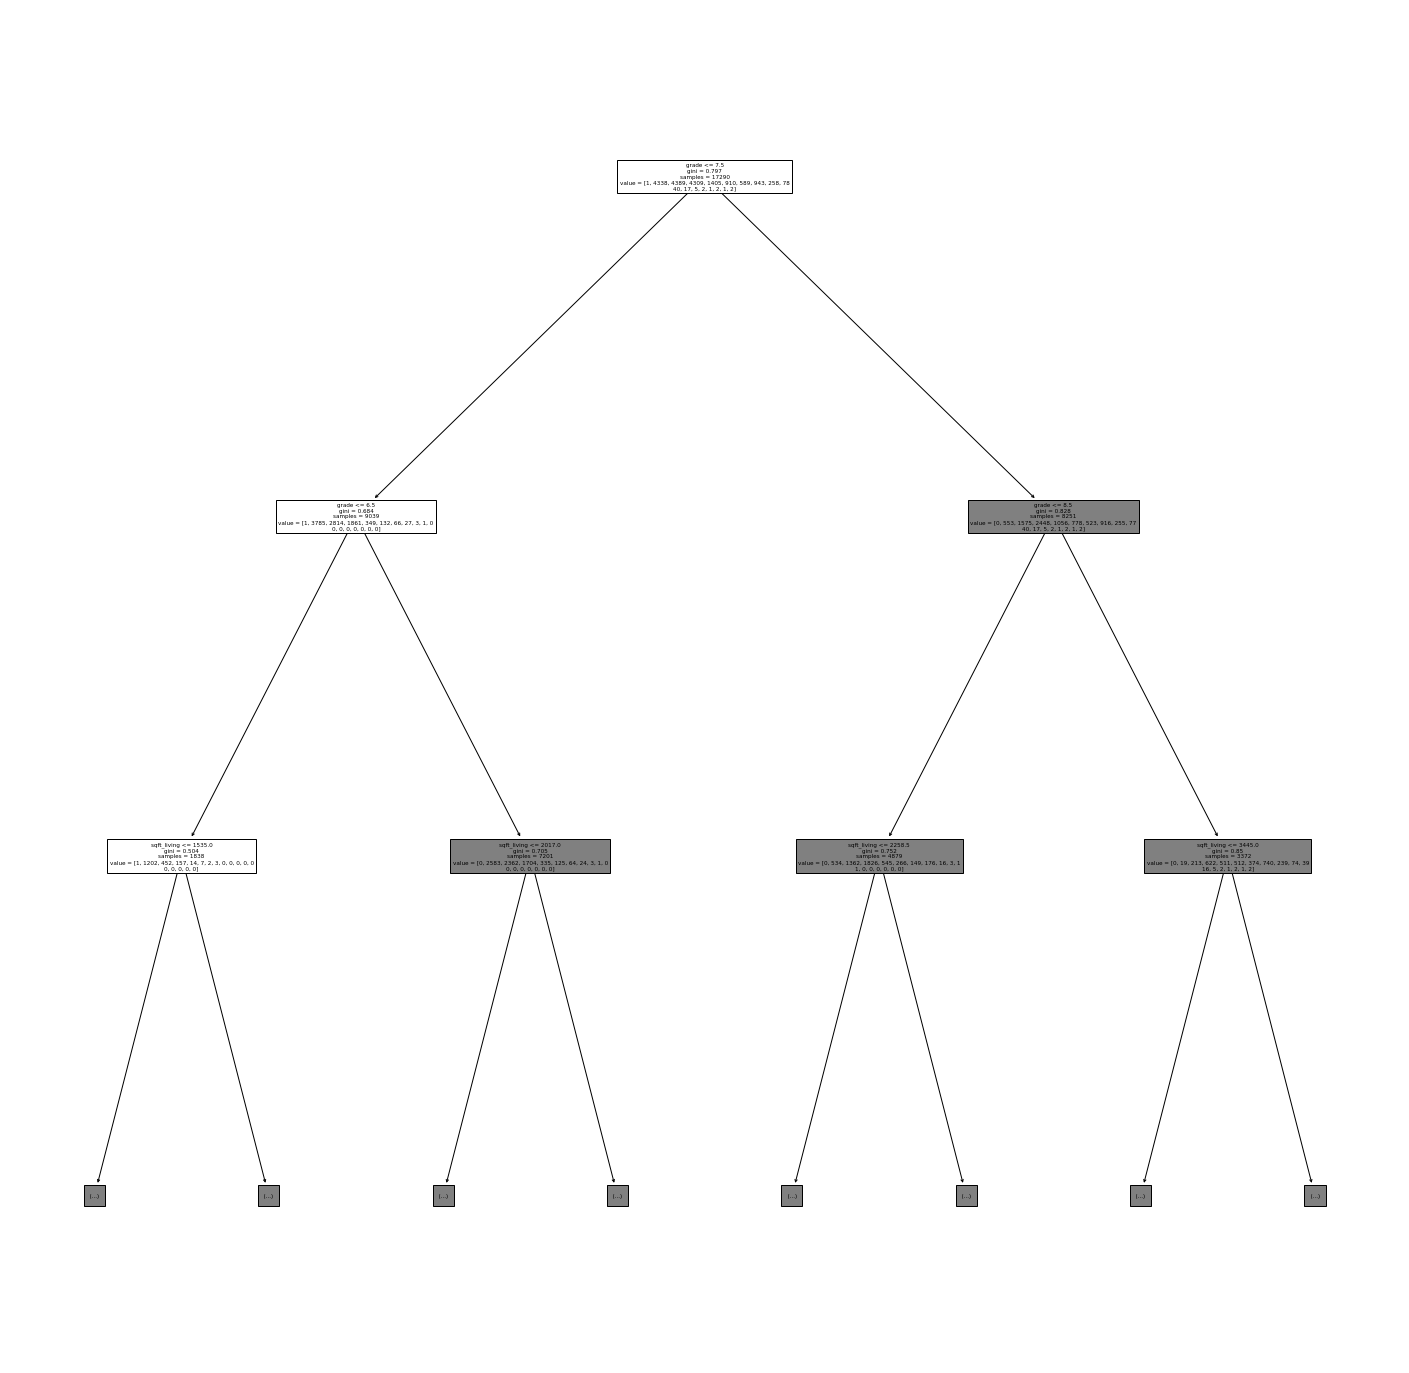

In [47]:
plt.figure(figsize=(25,25))
tplot = tree.plot_tree(classifierTree, feature_names=['bathrooms', 'grade', 'sqft_living'],max_depth=2)

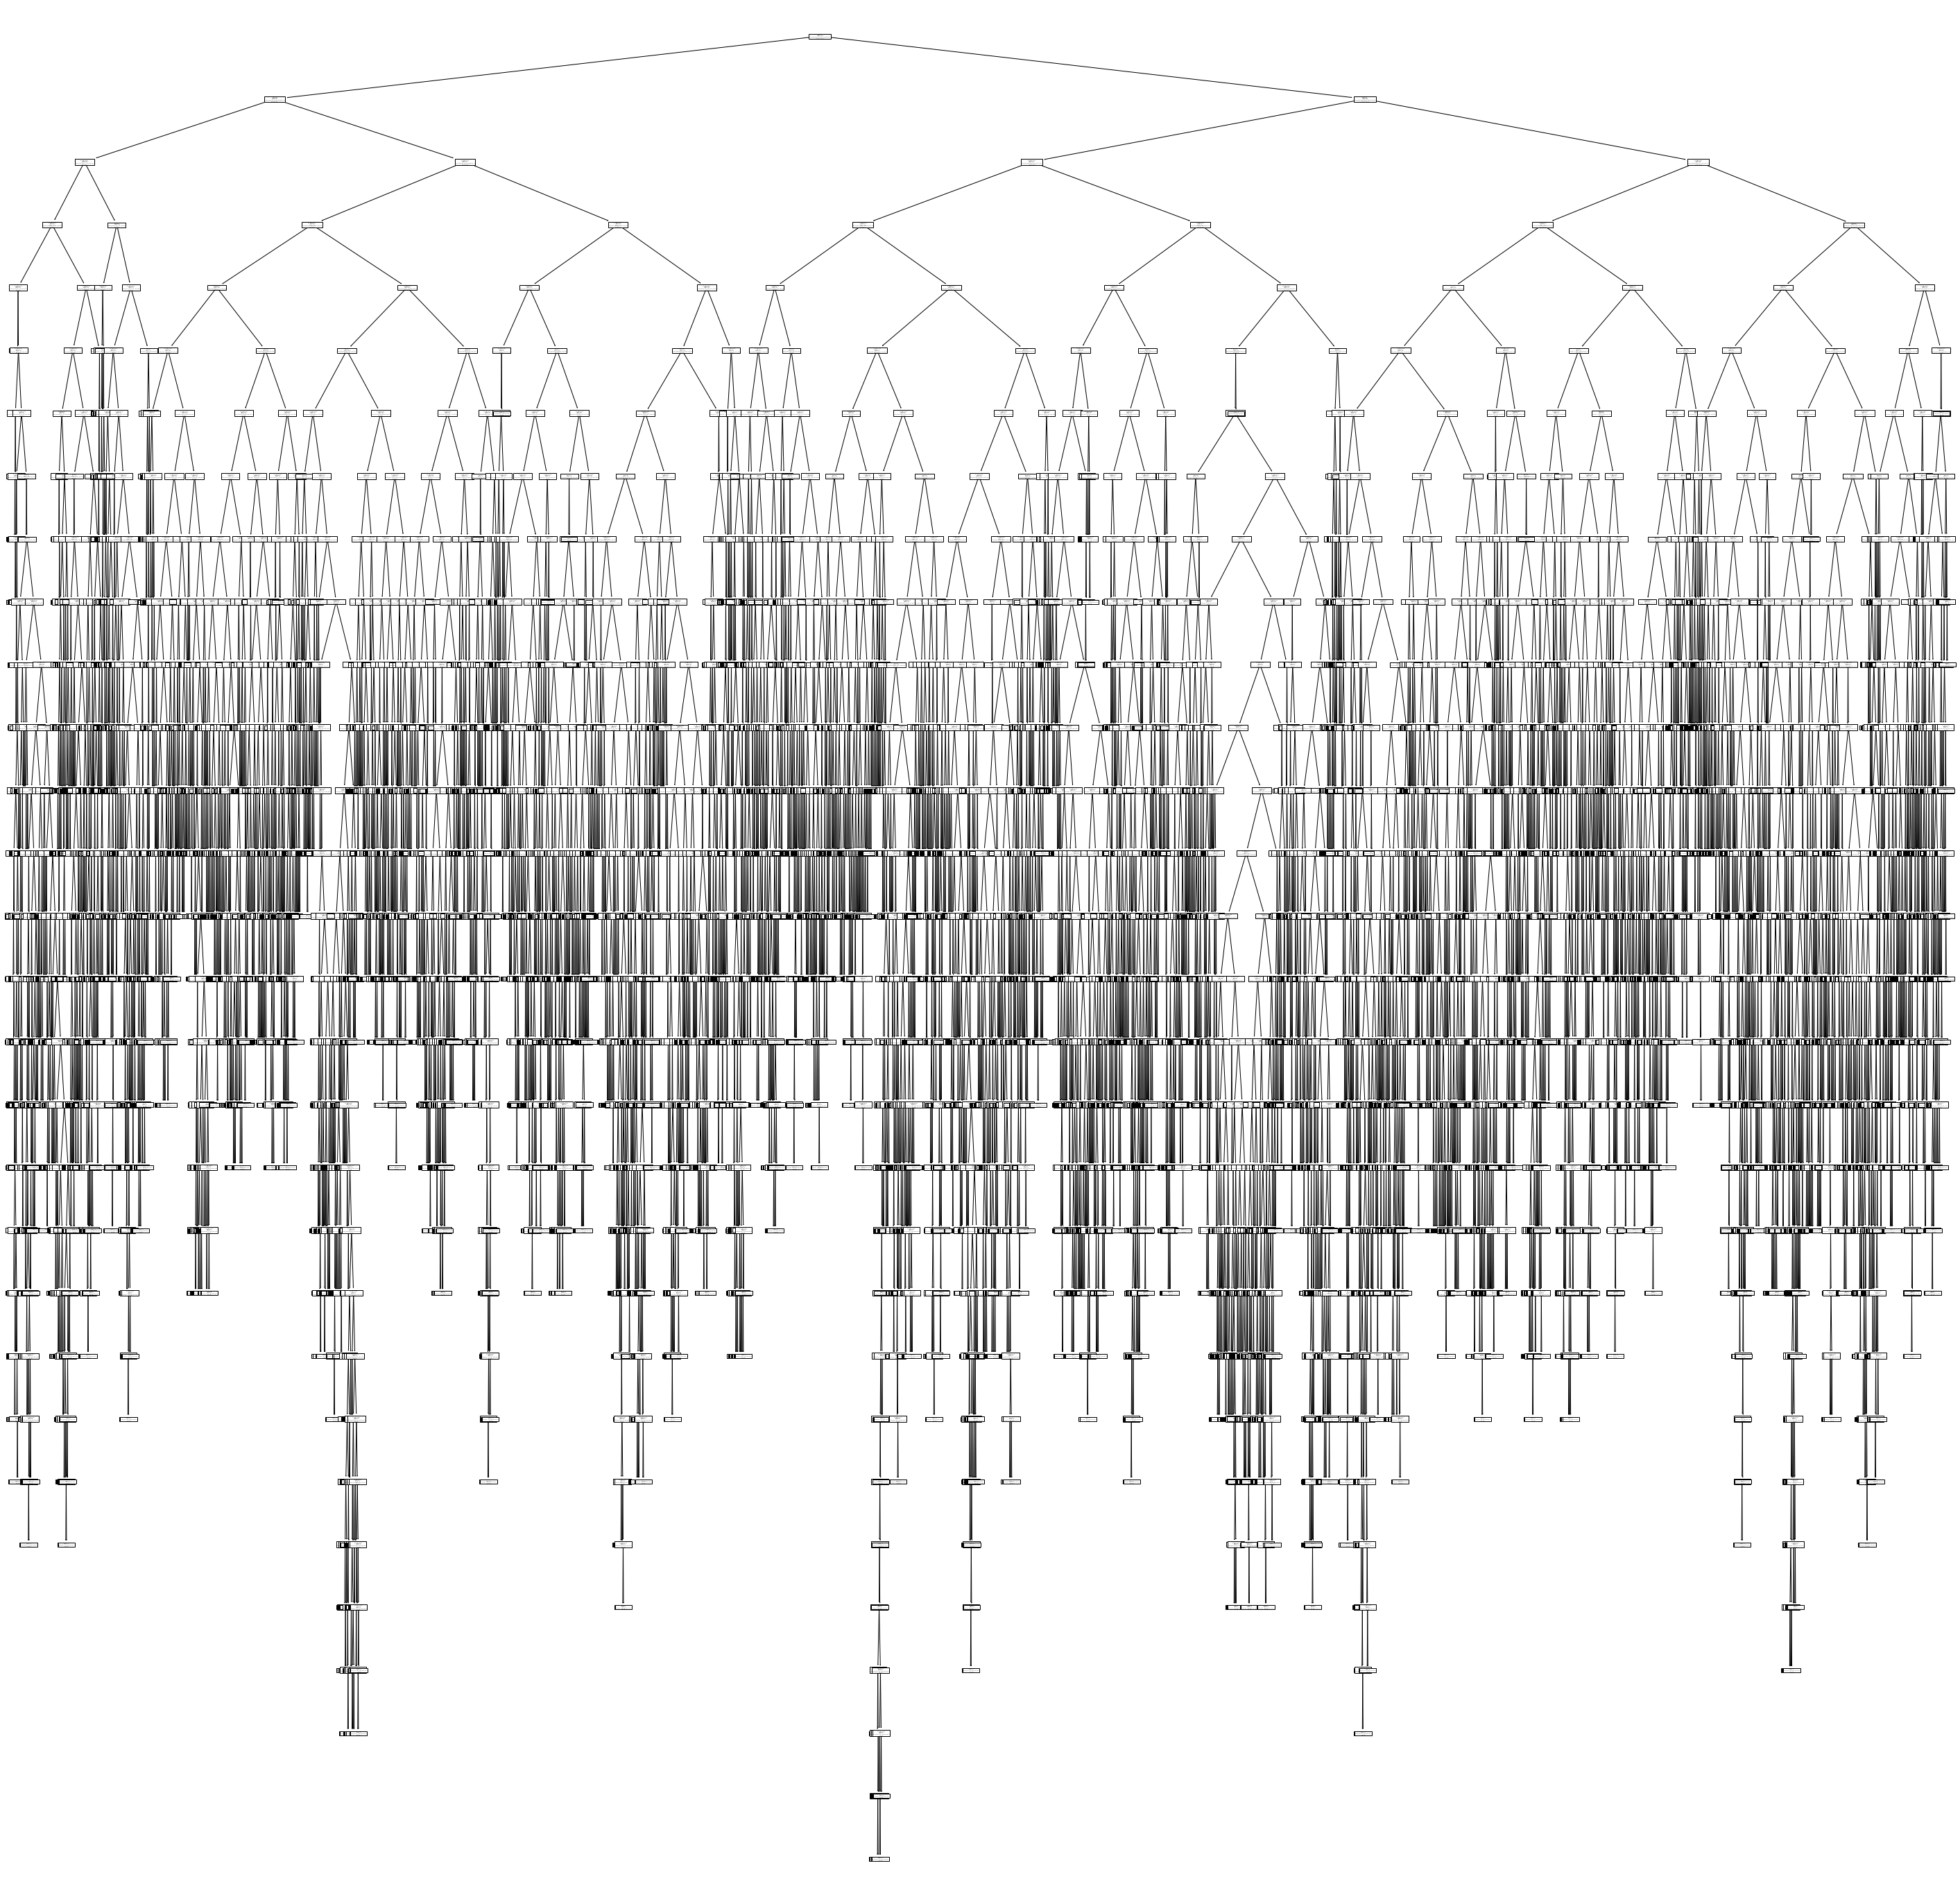

In [49]:
plt.figure(figsize=(50,50))
tplot = tree.plot_tree(classifierTree, feature_names=['bathrooms', 'grade', 'sqft_living'])